In [1]:
# 1. Explorasroty Data Analysis (EDA)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("data/data_car.csv")
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [2]:
df.describe(include='all')

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
count,11914,11914,11914.000000,11911,11845.00000,11884.000000,11914,11914,11908.000000,8172,11914,11914,11914.000000,11914.000000,11914.000000,1.191400e+04
unique,48,915,NaN,10,NaN,NaN,5,4,NaN,71,3,16,NaN,NaN,NaN,NaN
top,Chevrolet,Silverado 1500,NaN,regular unleaded,NaN,NaN,AUTOMATIC,front wheel drive,NaN,Crossover,Compact,Sedan,NaN,NaN,NaN,NaN
freq,1123,156,NaN,7172,NaN,NaN,8266,4787,NaN,1110,4764,3048,NaN,NaN,NaN,NaN
mean,NaN,NaN,2010.384338,NaN,249.38607,5.628829,NaN,NaN,3.436093,NaN,NaN,NaN,26.637485,19.733255,1554.911197,4.059474e+04
std,NaN,NaN,7.579740,NaN,109.19187,1.780559,NaN,NaN,0.881315,NaN,NaN,NaN,8.863001,8.987798,1441.855347,6.010910e+04
min,NaN,NaN,1990.000000,NaN,55.00000,0.000000,NaN,NaN,2.000000,NaN,NaN,NaN,12.000000,7.000000,2.000000,2.000000e+03
25%,NaN,NaN,2007.000000,NaN,170.00000,4.000000,NaN,NaN,2.000000,NaN,NaN,NaN,22.000000,16.000000,549.000000,2.100000e+04
50%,NaN,NaN,2015.000000,NaN,227.00000,6.000000,NaN,NaN,4.000000,NaN,NaN,NaN,26.000000,18.000000,1385.000000,2.999500e+04
75%,NaN,NaN,2016.000000,NaN,300.00000,6.000000,NaN,NaN,4.000000,NaN,NaN,NaN,30.000000,22.000000,2009.000000,4.223125e+04


In [3]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [4]:
df=df.drop(['Engine Fuel Type', 'Market Category','Vehicle Style', 'Popularity','Number of Doors','Vehicle Size'], axis=1)

In [5]:
df=df.rename(columns={"Engine HP":"HP","Engine Cylinders":"Cylinders","Transmission Type":"Transmission","Driven_Wheels":"Drive Mode","highway MPG":"MPG_H","city mpg":"MPG_C","MSRP":"Price"})
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG_H,MPG_C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [6]:
df.shape

(11914, 10)

In [7]:
duplicate_rows_df=df[df.duplicated()]
print("jumlah data yang diduplicate: ", duplicate_rows_df.shape)

jumlah data yang diduplicate:  (989, 10)


In [8]:
df.count()

Make            11914
Model           11914
Year            11914
HP              11845
Cylinders       11884
Transmission    11914
Drive Mode      11914
MPG_H           11914
MPG_C           11914
Price           11914
dtype: int64

In [9]:
df=df.drop_duplicates()
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG_H,MPG_C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [10]:
df.count()

Make            10925
Model           10925
Year            10925
HP              10856
Cylinders       10895
Transmission    10925
Drive Mode      10925
MPG_H           10925
MPG_C           10925
Price           10925
dtype: int64

In [11]:
print(df.isnull().sum())

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG_H            0
MPG_C            0
Price            0
dtype: int64


In [12]:
df=df.dropna()
df.count()

Make            10827
Model           10827
Year            10827
HP              10827
Cylinders       10827
Transmission    10827
Drive Mode      10827
MPG_H           10827
MPG_C           10827
Price           10827
dtype: int64

In [13]:
print(df.isnull().sum())

Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG_H           0
MPG_C           0
Price           0
dtype: int64


<Axes: xlabel='HP'>

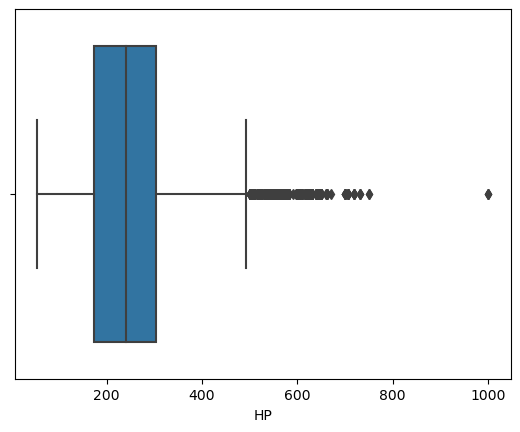

In [14]:
sns.boxplot(x=df["HP"])

In [15]:
df.Price.describe()

count    1.082700e+04
mean     4.249325e+04
std      6.229451e+04
min      2.000000e+03
25%      2.197250e+04
50%      3.084500e+04
75%      4.330000e+04
max      2.065902e+06
Name: Price, dtype: float64

<Axes: xlabel='Price'>

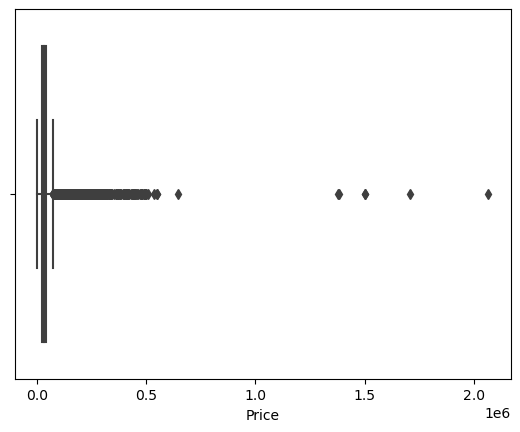

In [16]:
sns.boxplot(x=df['Price'])

Text(0.5, 0, 'Make')

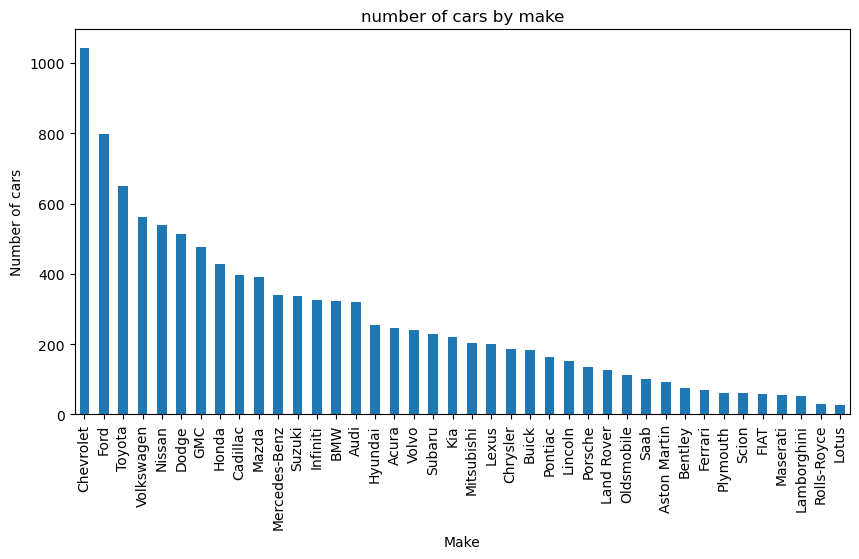

In [17]:
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make')

In [18]:
df[['HP',"Price"]].corr()

,HP,Price
HP,1.000000,0.659835
Price,0.659835,1.000000


C:\Users\ASUS\AppData\Local\Temp\ipykernel_2792\1206132976.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c=df.corr()


<Axes: >

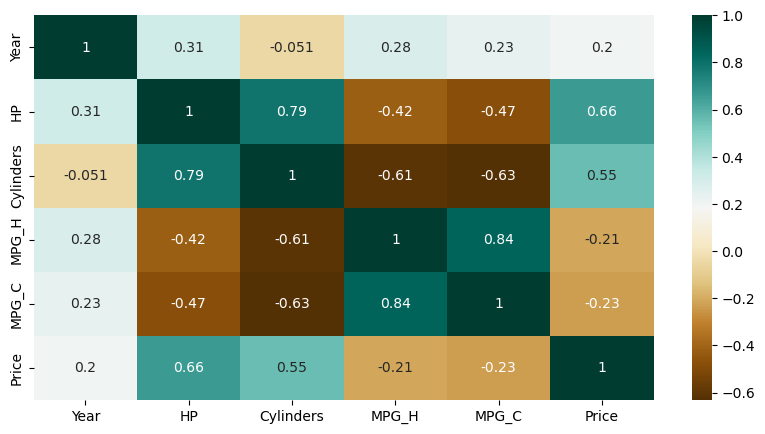

In [19]:
from IPython.core.pylabtools import figsize
plt.figure(figsize=(10,5))
c=df.corr()
sns.heatmap(c,cmap="BrBG", annot=True)

In [20]:
result=pd.pivot_table(data=df, index='Transmission',columns='Drive Mode',values='Price')
print(result)

Drive Mode        all wheel drive  four wheel drive  front wheel drive  \
Transmission                                                             
AUTOMATED_MANUAL    157828.994949               NaN       30761.103896   
AUTOMATIC            48403.715344      43019.606742       26441.647017   
DIRECT_DRIVE                  NaN               NaN       30318.181818   
MANUAL               60817.829016      12554.718412       15394.341637   
UNKNOWN                       NaN       2447.500000        2000.000000   

Drive Mode        rear wheel drive  
Transmission                        
AUTOMATED_MANUAL     175529.387097  
AUTOMATIC             56987.558117  
DIRECT_DRIVE          42700.000000  
MANUAL                44945.319690  
UNKNOWN                5146.500000  


In [21]:
# 2. DATA NORMALIZATION
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
data=pd.read_csv("data/gaji.csv")
print(data)

             Nama Status Rumah  Gaji Orang Tua  Umur
0      aldi taher      Kontrak         2100000    24
1          kekeyi        Milik         4000000    23
2   rangga sasana      Kontrak         1400000    21
3  vicky prasetyo      Kontrak          700000    28
4            zuko        Milik          650000    27
5           dyrga      Kontrak          450000    22


In [22]:
scaler = MinMaxScaler()

In [23]:
scaled = scaler.fit_transform(data[['Gaji Orang Tua','Umur']])

In [24]:
print(scaled)

[[0.46478873 0.42857143]
 [1.         0.28571429]
 [0.26760563 0.        ]
 [0.07042254 1.        ]
 [0.05633803 0.85714286]
 [0.         0.14285714]]


In [25]:
# Standardization
import pandas as pd
from sklearn.preprocessing import StandardScaler
data = pd.read_csv("data/gaji.csv")
print(data)

             Nama Status Rumah  Gaji Orang Tua  Umur
0      aldi taher      Kontrak         2100000    24
1          kekeyi        Milik         4000000    23
2   rangga sasana      Kontrak         1400000    21
3  vicky prasetyo      Kontrak          700000    28
4            zuko        Milik          650000    27
5           dyrga      Kontrak          450000    22


In [26]:
scaler = StandardScaler()

In [27]:
scaled = scaler.fit_transform(data[['Gaji Orang Tua','Umur']])
print(scaled)

[[ 0.44733685 -0.06551218]
 [ 1.99268231 -0.45858525]
 [-0.12200096 -1.24473139]
 [-0.69133876  1.5067801 ]
 [-0.73200575  1.11370703]
 [-0.89467369 -0.85165832]]


In [28]:
# 3. DATA DISCRETIZATION/BINING
# A. Teknik Manual

import pandas as pd
import numpy as np
data = data = pd.read_csv("data/datasetgaji.csv")
data.head(6)

,Nama,Status Rumah,Gaji Orang Tua,Keterangan
0,aldi taher,Kontrak,2100000,NaN
1,kekeyi,Milik,4000000,NaN
2,rangga sasana,Kontrak,1400000,NaN
3,vicky prasetyo,Kontrak,700000,NaN
4,zuko,Milik,650000,NaN
5,dyrga,Kontrak,450000,NaN


In [29]:
batas_bin = [0, 1400000, 4000000]

In [30]:
kategori = ['Kecil','Besar']

In [31]:
data['gaji_binned_1'] = pd.cut(data['Gaji Orang Tua'], bins=batas_bin, labels=kategori)
print(data)

             Nama Status Rumah  Gaji Orang Tua  Keterangan gaji_binned_1
0      aldi taher      Kontrak         2100000         NaN         Besar
1          kekeyi        Milik         4000000         NaN         Besar
2   rangga sasana      Kontrak         1400000         NaN         Kecil
3  vicky prasetyo      Kontrak          700000         NaN         Kecil
4            zuko        Milik          650000         NaN         Kecil
5           dyrga      Kontrak          450000         NaN         Kecil


In [33]:
# B. Teknik Linspace

from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
data = pd.read_csv("data/datasetgaji.csv")
data.head(6)

,Nama,Status Rumah,Gaji Orang Tua,Keterangan
0,aldi taher,Kontrak,2100000,NaN
1,kekeyi,Milik,4000000,NaN
2,rangga sasana,Kontrak,1400000,NaN
3,vicky prasetyo,Kontrak,700000,NaN
4,zuko,Milik,650000,NaN
5,dyrga,Kontrak,450000,NaN


In [34]:
bins = np.linspace(min(data['Gaji Orang Tua']), max(data['Gaji Orang Tua']), 3)
print(bins)

[ 450000. 2225000. 4000000.]


In [36]:
kategori = ['Kecil','Besar']
data['gaji_binned_2'] = pd.cut(data['Gaji Orang Tua'], bins=bins, labels=kategori, include_lowest=True)
print(data)

             Nama Status Rumah  Gaji Orang Tua  Keterangan gaji_binned_2
0      aldi taher      Kontrak         2100000         NaN         Kecil
1          kekeyi        Milik         4000000         NaN         Besar
2   rangga sasana      Kontrak         1400000         NaN         Kecil
3  vicky prasetyo      Kontrak          700000         NaN         Kecil
4            zuko        Milik          650000         NaN         Kecil
5           dyrga      Kontrak          450000         NaN         Kecil


In [37]:
# C. Teknik Quantile

from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
data = pd.read_csv("data/datasetgaji.csv")
data.head(6)

,Nama,Status Rumah,Gaji Orang Tua,Keterangan
0,aldi taher,Kontrak,2100000,NaN
1,kekeyi,Milik,4000000,NaN
2,rangga sasana,Kontrak,1400000,NaN
3,vicky prasetyo,Kontrak,700000,NaN
4,zuko,Milik,650000,NaN
5,dyrga,Kontrak,450000,NaN


In [39]:
data['gaji_binned_3'] = pd.qcut(data['Gaji Orang Tua'], 2)
print(data)

             Nama Status Rumah  Gaji Orang Tua  Keterangan  \
0      aldi taher      Kontrak         2100000         NaN   
1          kekeyi        Milik         4000000         NaN   
2   rangga sasana      Kontrak         1400000         NaN   
3  vicky prasetyo      Kontrak          700000         NaN   
4            zuko        Milik          650000         NaN   
5           dyrga      Kontrak          450000         NaN   

             gaji_binned_3  
0   (1050000.0, 4000000.0]  
1   (1050000.0, 4000000.0]  
2   (1050000.0, 4000000.0]  
3  (449999.999, 1050000.0]  
4  (449999.999, 1050000.0]  
5  (449999.999, 1050000.0]  


In [40]:
kategori = ['Kecil','Besar']
data['gaji_binned_3'] = pd.qcut(data['Gaji Orang Tua'], q=2, labels=kategori)
print(data)

             Nama Status Rumah  Gaji Orang Tua  Keterangan gaji_binned_3
0      aldi taher      Kontrak         2100000         NaN         Besar
1          kekeyi        Milik         4000000         NaN         Besar
2   rangga sasana      Kontrak         1400000         NaN         Besar
3  vicky prasetyo      Kontrak          700000         NaN         Kecil
4            zuko        Milik          650000         NaN         Kecil
5           dyrga      Kontrak          450000         NaN         Kecil


In [41]:
# 4. FEATURE ENGINERING

import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = pd.read_csv("data/train.csv")
print(data)
x = data.iloc[:,0:20] # independent columns
y = data.iloc[:,-1]

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       

In [45]:
# apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)

In [47]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [49]:
# concat two dataframe for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] # naming the dataframe columns
featureScores

,Specs,Score
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


In [50]:
print(featureScores.nlargest(10,'Score')) #print 10 best features

            Specs          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878
